In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

## Data Exploration

In [2]:
df=pd.read_csv(r"D:\project-files-music-genre-classification-with-pca\music_dataset_mod.csv")
df.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [3]:
df.isnull().sum()

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [5]:
df.Genre.value_counts()

Genre
Rock         190
Jazz         190
Country      180
Hip-hop      168
Classical    162
Name: count, dtype: int64

In [7]:
final_df=df[df['Genre'].notna()]

<Axes: xlabel='Genre', ylabel='count'>

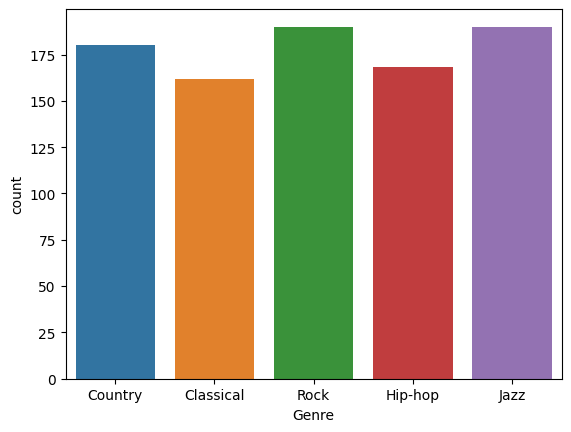

In [8]:
sns.countplot(x='Genre',data=final_df,hue='Genre')

## Logistic Regression

In [9]:
encoder=LabelEncoder()
final_df['Genre']=encoder.fit_transform(final_df['Genre'])
x=final_df.drop(columns='Genre')
y=final_df['Genre']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)
original_reg=LogisticRegression(max_iter=10000)
original_reg.fit(x_train,y_train)
ori_pred=original_reg.predict(x_test)
acc_original=accuracy_score(y_test,ori_pred)
classification_report_original=classification_report(y_test,ori_pred)


C:\Users\marut\AppData\Local\Temp\ipykernel_62288\2710317619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Genre']=encoder.fit_transform(final_df['Genre'])


## Correlation Analysis

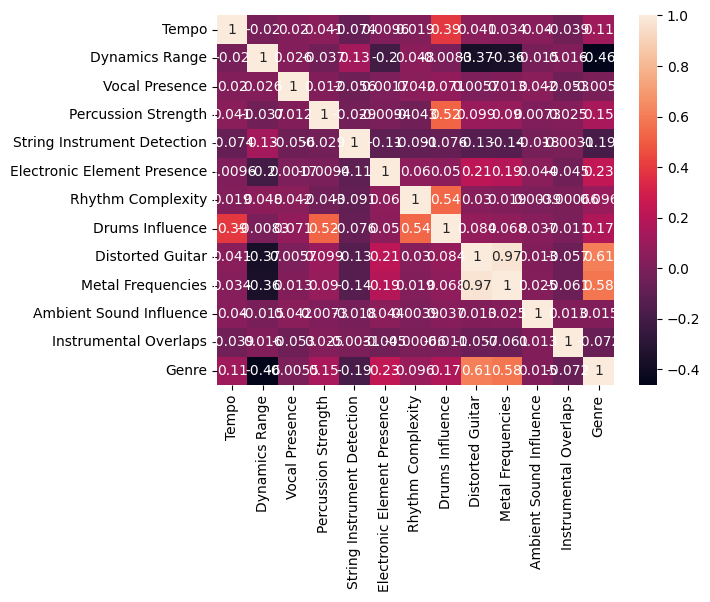

In [10]:
co=final_df.corr()
co
sns.heatmap(co,annot=True)
plt.Figure(figsize=(12,12))
plt.show()

## PCA For Dimentionality Reduction

In [11]:
scaler=StandardScaler()
pca=PCA()
pca.fit(scaler.fit_transform(x))
varience=pca.explained_variance_ratio_.cumsum()
varience

array([0.20063071, 0.35125878, 0.44495077, 0.53191983, 0.61728037,
       0.69895416, 0.77843687, 0.85457161, 0.92457383, 0.98453586,
       0.99720895, 1.        ])

In [12]:
# we use 8 components 
pca_8=PCA(n_components=8)
pca_data=pca_8.fit_transform(final_df)
x_pca_train,x_pca_test,y_pca_train,y_pca_test=train_test_split(pca_data,y,test_size=0.3,random_state=42)
pca_log=LogisticRegression(max_iter=10000)
pca_log.fit(x_pca_train,y_pca_train)
y_pca_pred=pca_log.predict(x_pca_test)
pca_accuracy=accuracy_score(y_pca_test,y_pca_pred)
classification_report_pca=classification_report(y_pca_test,y_pca_pred)

## Metrics of PCA vs Original Data

In [13]:
print("original accuracy:",acc_original)
print("pca accuracy:",pca_accuracy)

print("original classification report:\n",classification_report_original)
print("pca classification report:\n",classification_report_pca)

original accuracy: 0.5280898876404494
pca accuracy: 0.49812734082397003
original classification report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        51
           1       0.34      0.27      0.30        52
           2       0.45      0.46      0.45        48
           3       0.43      0.39      0.41        62
           4       0.50      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.53      0.52       267
weighted avg       0.51      0.53      0.52       267

pca classification report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90        51
           1       0.29      0.19      0.23        52
           2       0.45      0.46      0.45        48
           3       0.40      0.35      0.38        62
           4       0.43      0.54      0.48        54

    accuracy                           0.50       26

## Imputing Nulls Using Prediction  

In [18]:
test=df[df['Genre'].isna()].drop(columns='Genre')
test['Genre']=encoder.inverse_transform(original_reg.predict(test))
test

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,Classical
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,Country
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,Country
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,Hip-hop
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,Hip-hop
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,Rock
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,Hip-hop
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,Hip-hop
